In [457]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn

In [458]:
# Dataset available at https://data.cityofnewyork.us/City-Government/Good-Food-Purchasing-Data/usrf-za7k
path = 'Good_Food_Purchasing_Data.csv'
df= pd.read_csv(path)

In [459]:
df = df[df["Total Cost"].notna()]

In [460]:
filtered_df = df.iloc[:, 9:12]
categorical_df = df.iloc[:, 0:9]

categorical_df["Total Cost"] = df["Total Cost"]
categorical_df

Agency Time Period   Food Product Group  \
0      Administration for Childrens Services   2018-2019                Meals   
1      Administration for Childrens Services   2018-2019                Meals   
2      Administration for Childrens Services   2018-2019                Meals   
3      Administration for Childrens Services   2018-2019            Beverages   
4      Administration for Childrens Services   2018-2019  Condiments & Snacks   
...                                      ...         ...                  ...   
17203                Department of Education   2020-2021              Produce   
17204                Department of Education   2020-2021              Seafood   
17205                Department of Education   2020-2021              Seafood   
17206                Department of Education   2020-2021              Seafood   
17207                Department of Education   2020-2021              Seafood   

      Food Product Category                         Product Name  \
0                     Meals          baby food, dinner, assorted   
1                     Meals          baby food, dinner, assorted   
2                     Meals                   baby food, formula   
3                 Beverages               juice, fruit punch, ss   
4       Condiments & Snacks                cereal, baby, oatmeal   
...                     ...                                  ...   
17203            Vegetables  vegetable, blend, frozen, commodity   
17204               Seafood                 fish, patty, breaded   
17205               Seafood                  tuna, light, canned   
17206               Seafood                  tuna, light, canned   
17207               Seafood                  tuna, light, canned   

                                            Product Type      Origin Detail  \
0             Stage 2 Baby Food Dinner, Assorted Variety          Beech-Nut   
1             Stage 3 Baby Food Dinner, Assorted Variety          Beech-Nut   
2      Premium Nursette Ready-to-Feed Infant Formula,...            Enfamil   
3               100% Juice Variety Pack, 4 fl oz bottles            Enfamil   
4                       Single Grain Oatmeal Baby Cereal            Enfamil   
...                                                  ...                ...   
17203   Veg Mixed Vegetable No Salt Added Frzn USDA (VO)             NA, NA   
17204                                 Fish Breaded Patty  NA, New Hampshire   
17205                                Fish Tuna Light Can         Golbon, NA   
17206                                Fish Tuna Light Can         Golbon, NA   
17207                                Fish Tuna Light Can        Premium, NA   

                                             Distributor  \
0                                           Babylab Inc.   
1                                           Babylab Inc.   
2                                           Babylab Inc.   
3                                           Babylab Inc.   
4                                           Babylab Inc.   
...                                                  ...   
17203                                                NaN   
17204                                                NaN   
17205                                             FoodCo   
17206                                       Teri Nichols   
17207  Driscoll Foods Food Service / Metropolitan Foo...   

                                                  Vendor  Total Cost  
0                                           Babylab Inc.       560.0  
1                                           Babylab Inc.       600.0  
2                                           Babylab Inc.     16200.0  
3                                           Babylab Inc.      1940.0  
4                                           Babylab Inc.       290.0  
...                                                  ...         ...  
17203                                                NaN     49463.0  
17204     

In [461]:
# Step 2: Explore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3767 entries, 0 to 17207
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Agency                 3767 non-null   object 
 1   Time Period            3767 non-null   object 
 2   Food Product Group     3767 non-null   object 
 3   Food Product Category  3767 non-null   object 
 4   Product Name           3766 non-null   object 
 5   Product Type           3767 non-null   object 
 6   Origin Detail          3641 non-null   object 
 7   Distributor            2856 non-null   object 
 8   Vendor                 3281 non-null   object 
 9   # of Units             3766 non-null   float64
 10  Total Weight in lbs    3751 non-null   float64
 11  Total Cost             3767 non-null   float64
dtypes: float64(3), object(9)
memory usage: 382.6+ KB


In [462]:
df.describe()

# of Units  Total Weight in lbs    Total Cost
count  3.766000e+03         3.751000e+03  3.767000e+03
mean   8.180884e+04         1.129059e+05  1.398539e+05
std    1.274140e+06         6.780194e+05  4.243162e+05
min    0.000000e+00         0.000000e+00  0.000000e+00
25%    1.010000e+02         3.500000e+02  1.210000e+03
50%    9.820000e+02         6.100000e+03  1.570800e+04
75%    5.568750e+03         5.579600e+04  9.308300e+04
max    5.050947e+07         2.525474e+07  9.110741e+06

<Axes: >

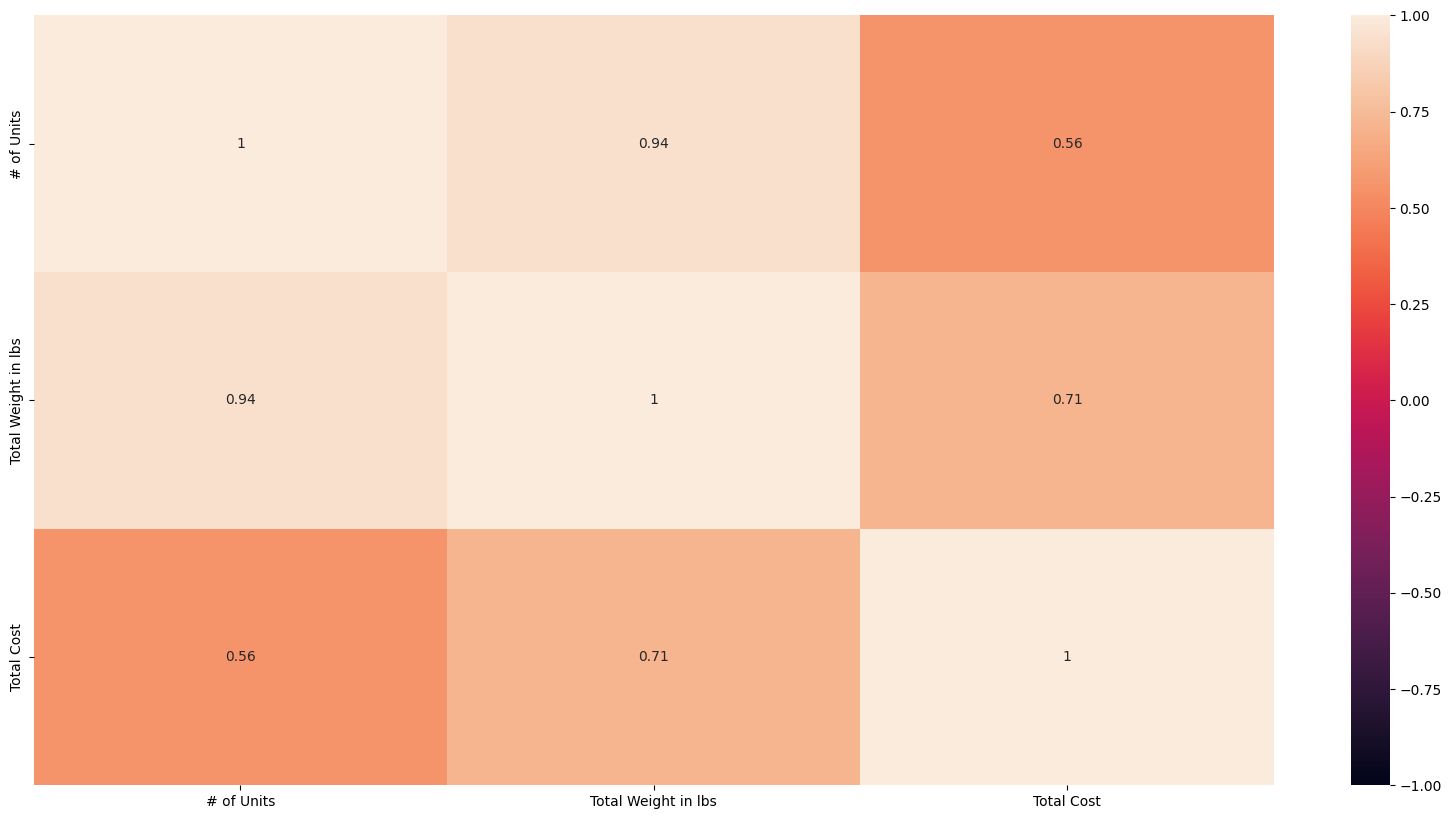

In [463]:
import matplotlib.colors as clr
# correlation matrix
myColors = ("red","white","blue")
cmap1 = clr.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
corr = filtered_df.corr()
mask = np.zeros_like(corr, dtype=bool)
#mask[np.triu_indices_from(mask)]= True
plt.figure(figsize=(20,10))
sns.heatmap(corr, mask = mask, vmin = -1, vmax = 1, annot=True)

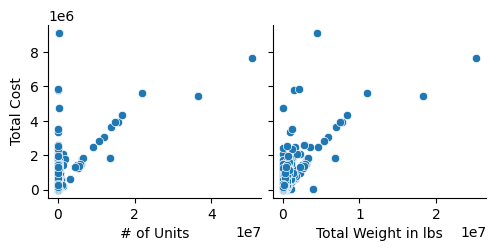

In [464]:
# Let Target be Total_cost
x_vars = ["# of Units", "Total Weight in lbs"]
y_vars = ["Total Cost"]
sns.pairplot(filtered_df, x_vars=x_vars, y_vars=y_vars)

<Axes: xlabel='Total Cost', ylabel='Food Product Category'>

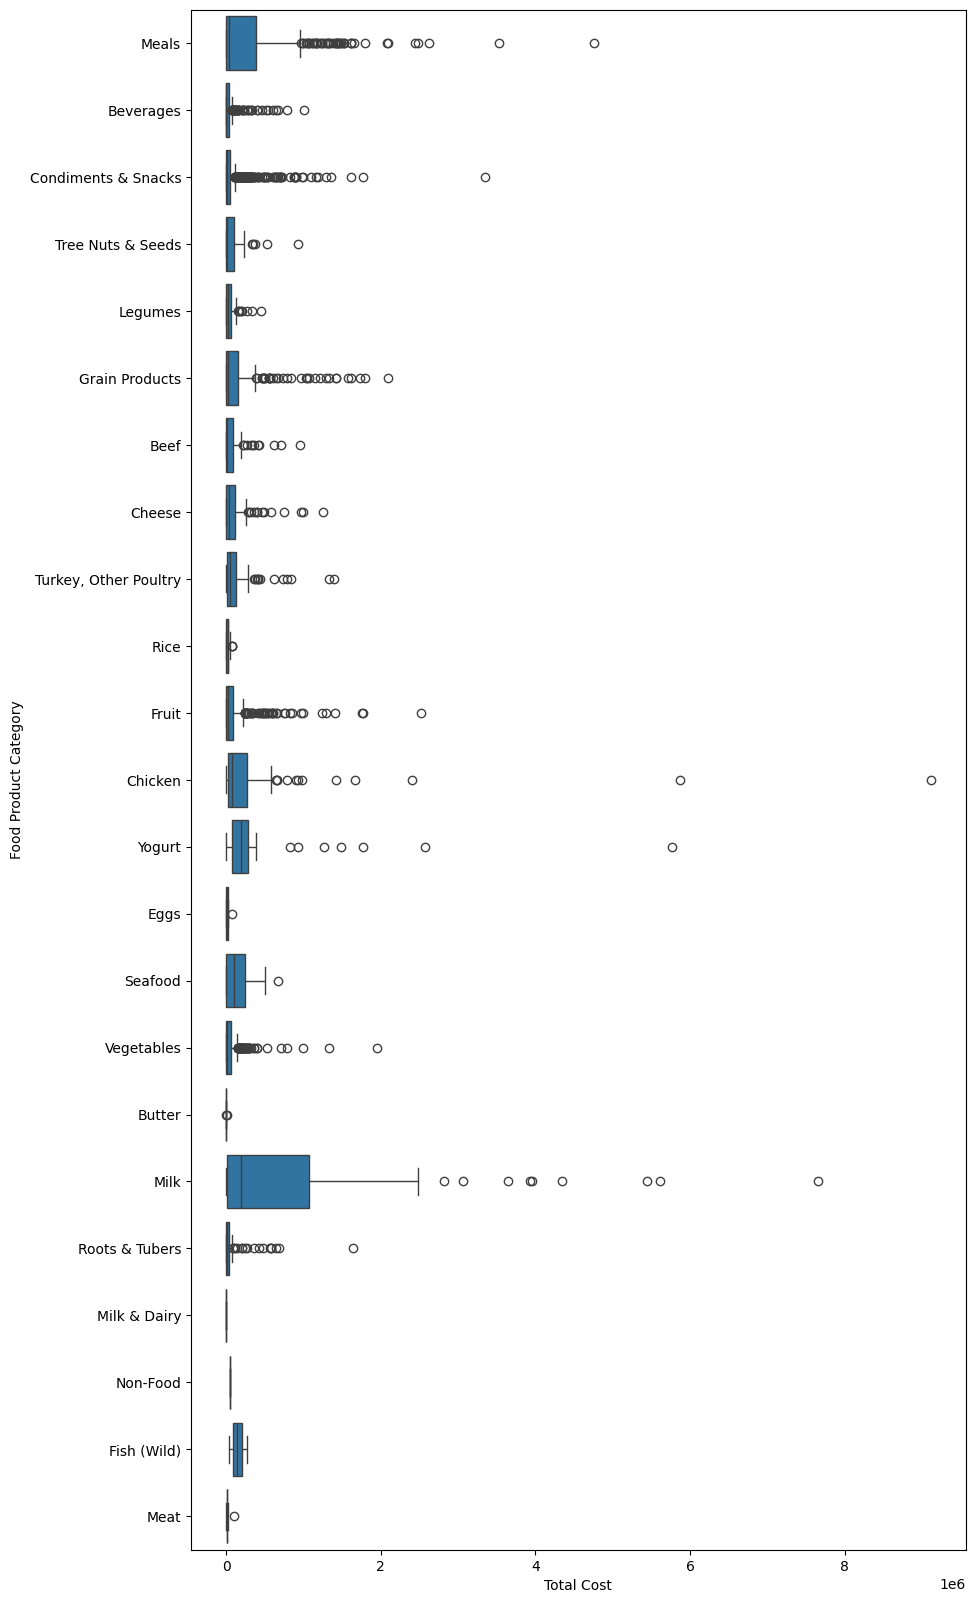

In [420]:
plt.figure(figsize=(10, 20))  # Adjust the figure size as needed
sns.boxplot( x="Total Cost", y="Food Product Category", data=categorical_df)

<Axes: xlabel='Total Cost', ylabel='Vendor'>

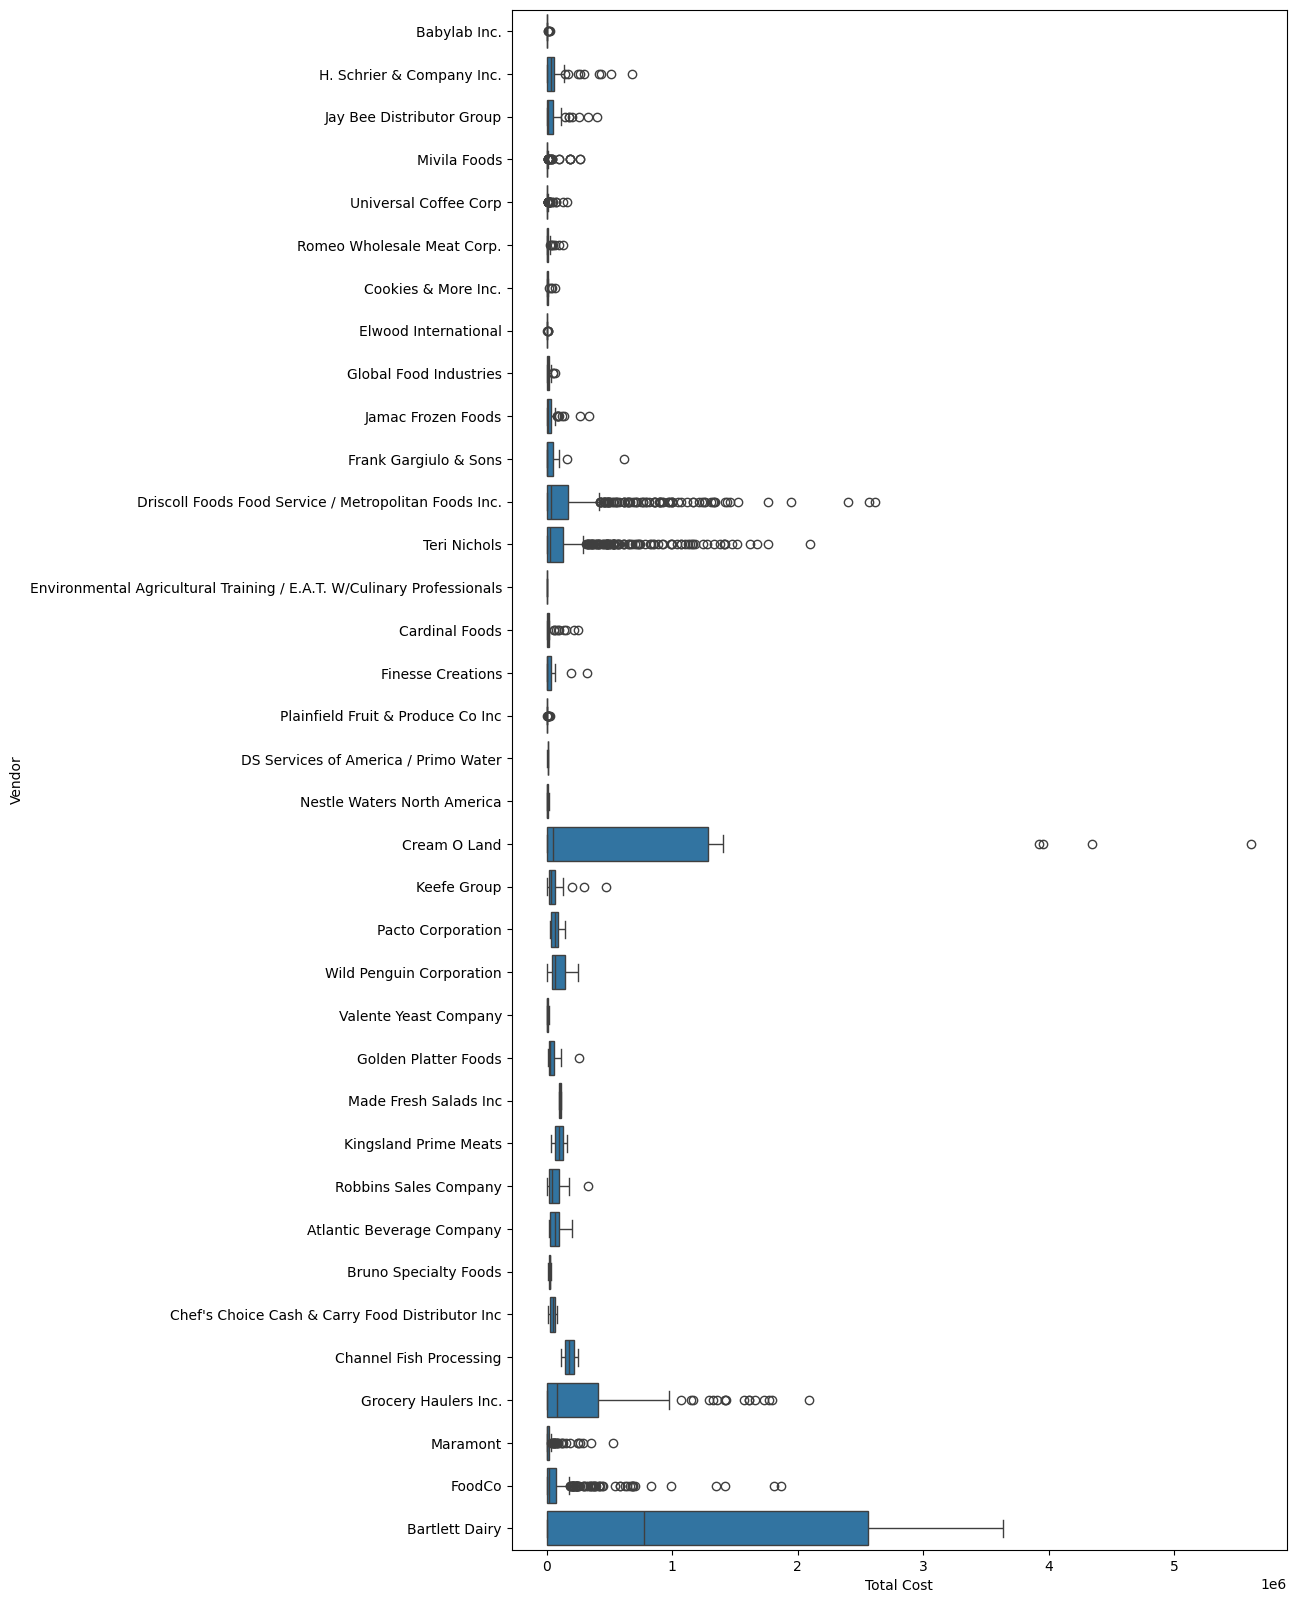

In [421]:
plt.figure(figsize=(10, 20))  # Adjust the figure size as needed
sns.boxplot(x="Total Cost", y="Vendor", data=categorical_df)

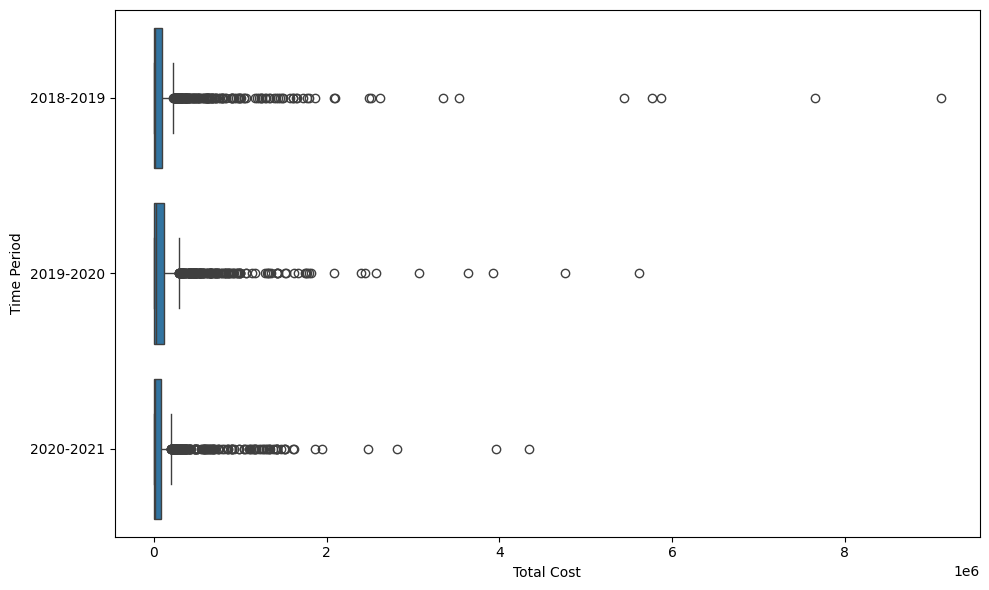

In [422]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot( x="Total Cost", y="Time Period", data=categorical_df)
plt.tight_layout()

In [423]:
plt.figure(figsize=(10,600))  # Adjust the figure size as needed
sns.barplot(data=categorical_df, hue="Time Period", x="Total Cost", y="Product Name", orient="h")
plt.tight_layout()

<Axes: xlabel='Total Cost', ylabel='Food Product Group'>

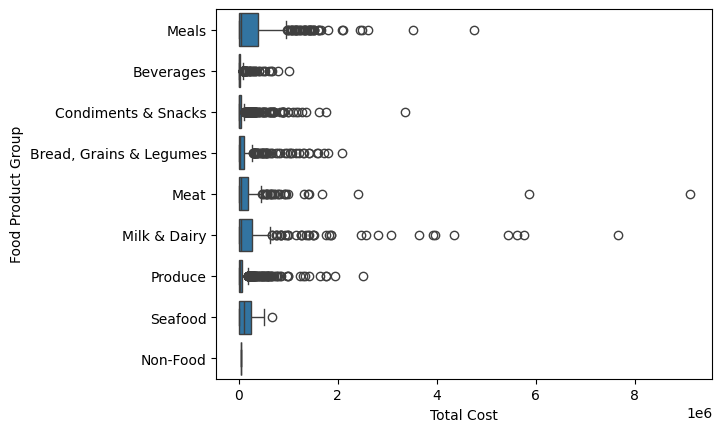

In [424]:
sns.boxplot( x="Total Cost", y="Food Product Group", data=categorical_df)

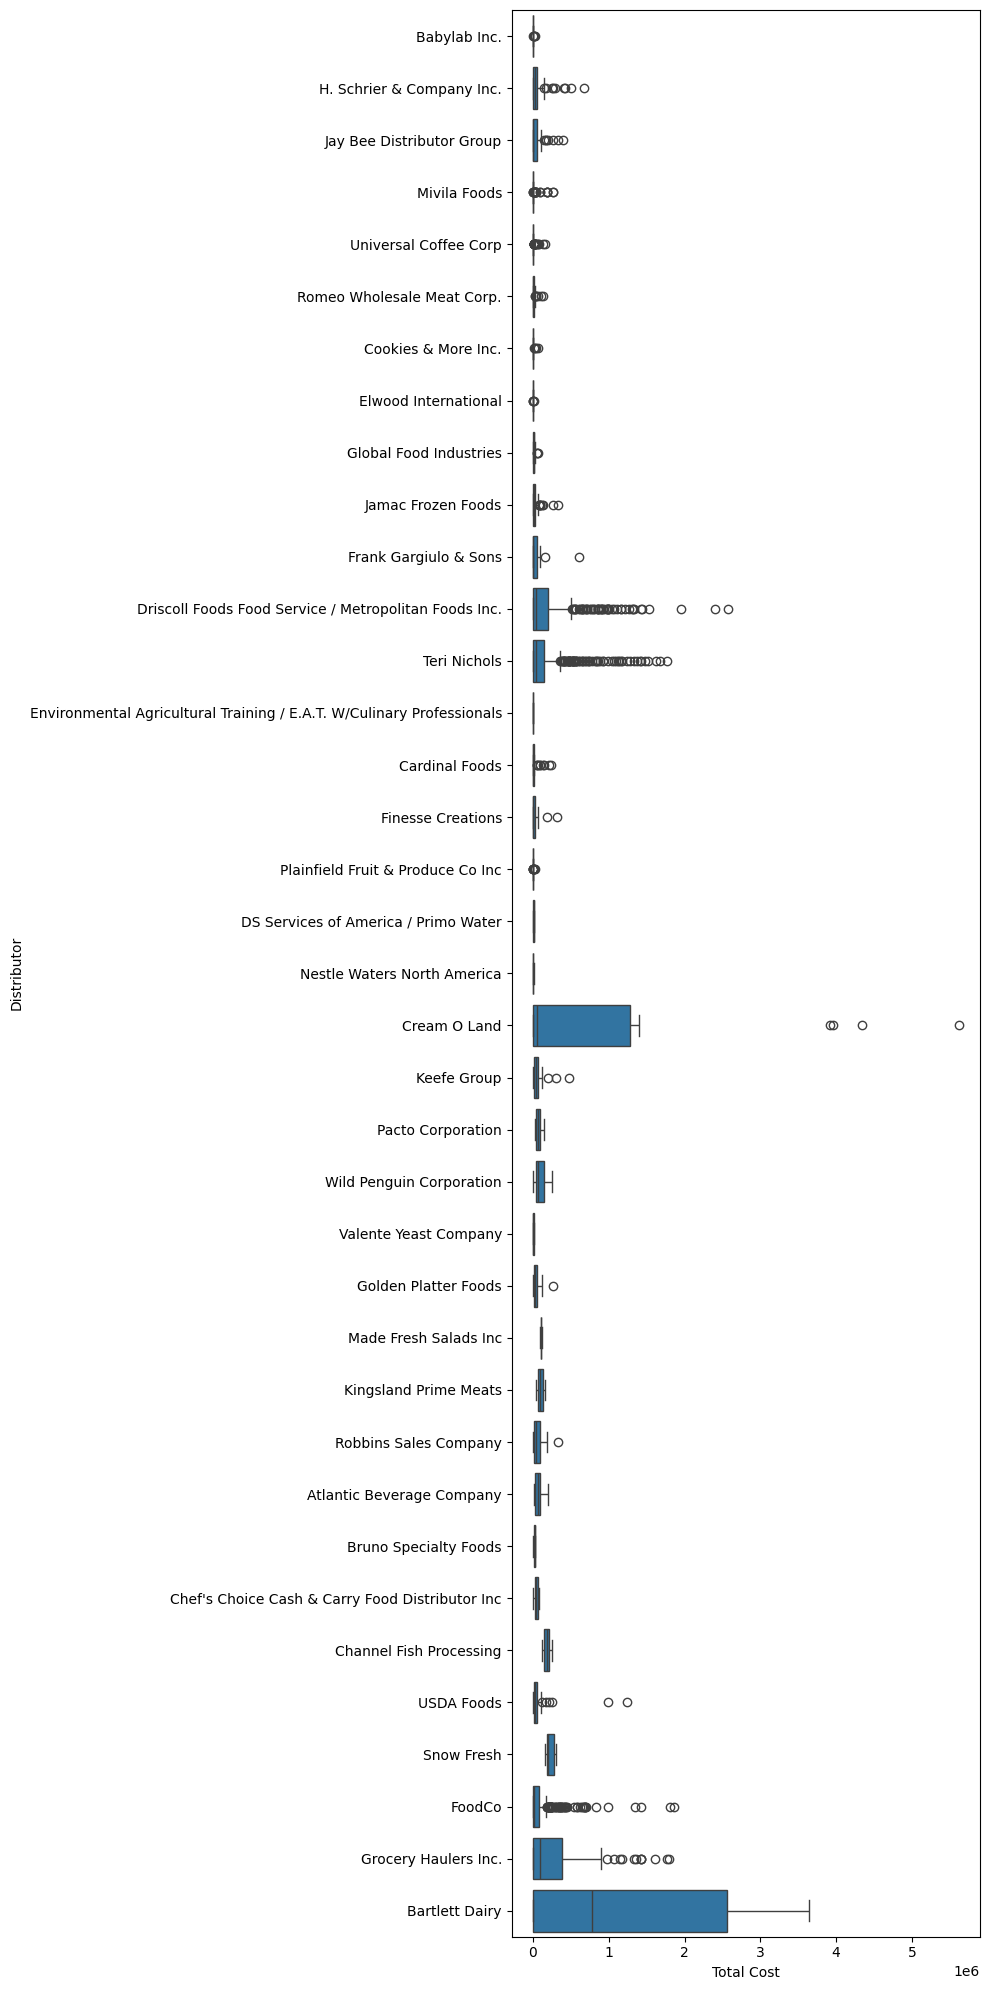

In [465]:
plt.figure(figsize=(10, 20))  # Adjust the figure size as needed
sns.boxplot( x="Total Cost", y="Distributor", data=categorical_df)
plt.tight_layout()  # Adjust layout for better visibility

<Axes: xlabel='Total Cost', ylabel='Agency'>

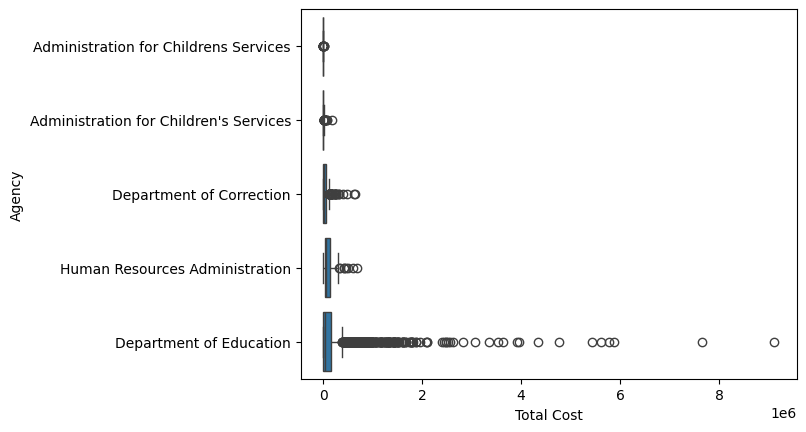

In [466]:
sns.boxplot( x="Total Cost", y="Agency", data=categorical_df)

In [467]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
categorical_cols = ['Food Product Category']
numeric_cols = ['# of Units', 'Total Weight in lbs']
X=df[['# of Units', 'Total Weight in lbs','Food Product Category']]
y=df['Total Cost']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=124)
X_train


# of Units  Total Weight in lbs Food Product Category
15512       225.0               4500.0        Grain Products
16571       958.0              10251.0   Condiments & Snacks
246           3.0                 60.0   Condiments & Snacks
16382         7.0                245.0             Beverages
148          14.0                349.0               Seafood
...           ...                  ...                   ...
4939     298266.0             298266.0               Chicken
135           1.0                  6.0   Condiments & Snacks
15506       735.0              15435.0        Grain Products
4645      76100.0              76100.0        Roots & Tubers
462           6.0                 72.0   Condiments & Snacks

[2825 rows x 3 columns]

In [468]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Splitting data into numerical and categorical DataFrames
X_train_categorical = X_train[categorical_cols]
X_train_numeric = X_train[numeric_cols]
X_test_categorical = X_test[categorical_cols]
X_test_numeric = X_test[numeric_cols]

# Pipeline for categorical data
categorical_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Pipeline for numerical data
numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # or any desired strategy
])

# Fit and transform categorical data
X_train_categorical_enc = pd.DataFrame(categorical_pipe.fit_transform(X_train_categorical), columns=categorical_pipe['encoder'].get_feature_names_out(X_train_categorical.columns))
X_test_categorical_enc = pd.DataFrame(categorical_pipe.transform(X_test_categorical), columns=categorical_pipe['encoder'].get_feature_names_out(X_test_categorical.columns))

# Fit and transform numerical data
X_train_numeric_enc = pd.DataFrame(numeric_pipe.fit_transform(X_train_numeric), columns=X_train_numeric.columns)
X_test_numeric_enc = pd.DataFrame(numeric_pipe.transform(X_test_numeric), columns=X_test_numeric.columns)

# Display the transformed DataFrames
X_train_numeric_enc

c:\Users\rahul\OneDrive\Documents\Desktop\CS301_Project_1\myvenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# of Units  Total Weight in lbs
0          225.0               4500.0
1          958.0              10251.0
2            3.0                 60.0
3            7.0                245.0
4           14.0                349.0
...          ...                  ...
2820    298266.0             298266.0
2821         1.0                  6.0
2822       735.0              15435.0
2823     76100.0              76100.0
2824         6.0                 72.0

[2825 rows x 2 columns]

In [469]:
# Concatenating transformed categorical and numerical data
X_train_processed = pd.concat([X_train_numeric_enc, X_train_categorical_enc], axis=1)
X_test_processed = pd.concat([X_test_numeric_enc, X_test_categorical_enc], axis=1)

<Axes: ylabel='Total Cost'>

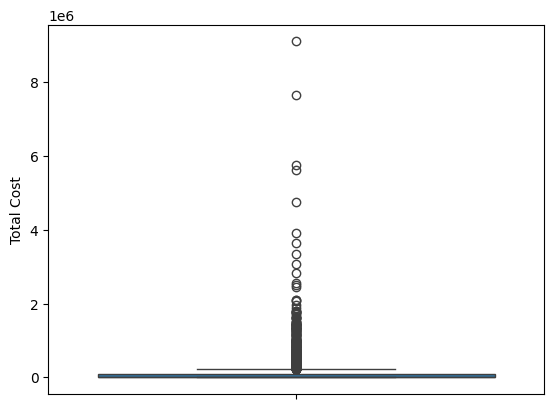

In [470]:
sns.boxplot(y_train)

In [471]:
X_train_processed

# of Units  Total Weight in lbs  Food Product Category_Beef  \
0          225.0               4500.0                         0.0   
1          958.0              10251.0                         0.0   
2            3.0                 60.0                         0.0   
3            7.0                245.0                         0.0   
4           14.0                349.0                         0.0   
...          ...                  ...                         ...   
2820    298266.0             298266.0                         0.0   
2821         1.0                  6.0                         0.0   
2822       735.0              15435.0                         0.0   
2823     76100.0              76100.0                         0.0   
2824         6.0                 72.0                         0.0   

      Food Product Category_Beverages  Food Product Category_Butter  \
0                                 0.0                           0.0   
1                                 0.0                           0.0   
2                                 0.0                           0.0   
3                                 1.0                           0.0   
4                                 0.0                           0.0   
...                               ...                           ...   
2820                              0.0                           0.0   
2821                              0.0                           0.0   
2822                              0.0                           0.0   
2823                              0.0                           0.0   
2824                              0.0                           0.0   

      Food Product Category_Cheese  Food Product Category_Chicken  \
0                              0.0                            0.0   
1                              0.0                            0.0   
2                              0.0                            0.0   
3                              0.0                            0.0   
4                              0.0                            0.0   
...                            ...                            ...   
2820                           0.0                            1.0   
2821                           0.0                            0.0   
2822                           0.0                            0.0   
2823                           0.0                            0.0   
2824                           0.0                            0.0   

      Food Product Category_Condiments & Snacks  Food Product Category_Eggs  \
0                                           0.0                         0.0   
1                                           1.0                         0.0   
2                                           1.0                         0.0   
3                                           0.0                         0.0   
4                                           0.0                         0.0   
...                                         ...                         ...   
2820                                        0.0                         0.0   
2821                                        1.0                         0.0   
2822                                        0.0                         0.0   
2823                                        0.0                         0.0   
2824                                        1.0                         0.0   

      Food Product Category_Fish (Wild)  ...  Food Product Category_Milk  \
0                                   0.0  ...                         0.0   
1                                   0.0  ...                         0.0   
2                                   0.0  ...                         0.0   
3                                   0.0  ...                         0.0   
4                                   0.0  ...                         0.0   
...                                 ...  ...                         ...   
2820          

In [472]:
X_test_processed

# of Units  Total Weight in lbs  Food Product Category_Beef  \
0          20.0                240.0                         0.0   
1         264.0                264.0                         0.0   
2           6.0                200.0                         0.0   
3           1.0                 34.0                         0.0   
4           4.0                 51.0                         0.0   
..          ...                  ...                         ...   
937    942296.0             942296.0                         0.0   
938         6.0                110.0                         0.0   
939      4599.0               1150.0                         0.0   
940     44993.0             494923.0                         0.0   
941       361.0               2482.0                         0.0   

     Food Product Category_Beverages  Food Product Category_Butter  \
0                                1.0                           0.0   
1                                0.0                           0.0   
2                                0.0                           0.0   
3                                1.0                           0.0   
4                                0.0                           0.0   
..                               ...                           ...   
937                              0.0                           0.0   
938                              1.0                           0.0   
939                              0.0                           0.0   
940                              0.0                           0.0   
941                              0.0                           0.0   

     Food Product Category_Cheese  Food Product Category_Chicken  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   
..                            ...                            ...   
937                           0.0                            0.0   
938                           0.0                            0.0   
939                           0.0                            0.0   
940                           0.0                            0.0   
941                           0.0                            0.0   

     Food Product Category_Condiments & Snacks  Food Product Category_Eggs  \
0                                          0.0                         0.0   
1                                          1.0                         0.0   
2                                          1.0                         0.0   
3                                          0.0                         0.0   
4                                          1.0                         0.0   
..                                         ...                         ...   
937                                        0.0                         0.0   
938                                        0.0                         0.0   
939                                        0.0                         0.0   
940                                        0.0                         0.0   
941                                        1.0                         0.0   

     Food Product Category_Fish (Wild)  ...  Food Product Category_Milk  \
0                                  0.0  ...                         0.0   
1                                  0.0  ...                         0.0   
2                                  0.0  ...                         0.0   
3                                  0.0  ...                         0.0   
4                                  0.0  ...                         0.0   
..                                 ...  ...                         ...   
937                                0.0  ...                         

In [473]:
# Fill NaN in y_train with the mean
y_train = y_train.fillna(y_train.mean())
# Step 5: Build a regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model=lr.fit(X_train_processed,y_train)

In [474]:
# Fill NaN in y_test with the mean
y_test = y_test.fillna(y_test.mean())
# Evaluation Metric 1: R^2 score
from sklearn.metrics import r2_score
y_predicted = model.predict(X_test_processed)
r2_score(y_test, y_predicted)

0.7352783992809604

In [475]:
# Evaluation metric 2: MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predicted)

54032711492.23846

In [436]:
# Make prediction for the new set of feature values (5, 15, 0, 0, 0, 1, 0, 0, 0, 0, 0)
# Prediciting the total cost of 5 units of Meals, weighing 15 lbs
model.predict(np.array([[5, 15, 0, 0, 0, 1, 0, 0, 0, 0, 0]]))

c:\Users\rahul\OneDrive\Documents\Desktop\CS301_Project_1\myvenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 11 features, but LinearRegression is expecting 25 features as input.